# Relation between Country development and its energy usage

Data used in this visualization provided by worldbank.  

### Dataset
    Dataset is collection of gender statistics, compiled from various international source.https://databank.worldbank.org/source/gender-statistics. 
    
    Choosed timeline of data between last 10 years 2011-2021

In [50]:
# Importing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Loding data set
raw_df = pd.read_csv("data/data.csv")

In [52]:
raw_df.shape

(5570, 14)

In [53]:
raw_df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2020 [YR2020]', '2019 [YR2019]', '2018 [YR2018]', '2017 [YR2017]',
       '2016 [YR2016]', '2015 [YR2015]', '2014 [YR2014]', '2013 [YR2013]',
       '2012 [YR2012]', '2011 [YR2011]'],
      dtype='object')

In [54]:
raw_df.head()

,Country Name,Country Code,Series Name,Series Code,2020 [YR2020],2019 [YR2019],2018 [YR2018],2017 [YR2017],2016 [YR2016],2015 [YR2015],2014 [YR2014],2013 [YR2013],2012 [YR2012],2011 [YR2011]
0,Africa Eastern and Southern,AFE,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,NaN,NaN,39.685068,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,398.000000,408.000000,419.000000,433.000000,446.000000,462.000000,480.000000
2,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,NaN,93.231944,94.695223,96.146492,97.916601,99.719799,101.541782,103.391460,105.256165,107.052622
3,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.326919,64.005197,63.648988,63.246264,62.787681,62.259288,61.647367,60.953363,60.185561,59.353595
4,Africa Eastern and Southern,AFE,"Female share of graduates in Engineering, Manu...",SE.TER.GRAD.FE.EN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Melting the individual years columns to be one column with the individual years as rows
id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code']

In [56]:
dfmelt = pd.melt(frame=raw_df,id_vars=id_vars, var_name="year", value_name="value")

In [57]:
# Formatting 
dfmelt["year"] = dfmelt["year"].str.extract('(\d+)', expand=False).astype(int)
dfmelt["value"] = dfmelt["value"].astype(float)

In [58]:
# Cleaning out unnecessary rows with empty values
dfmelt = dfmelt.dropna()

In [59]:
dfmelt = dfmelt[["Country Name",
         "Country Code",
         "Series Name",
         "Series Code",
         "year",
         "value"]]

dfmelt = dfmelt.sort_values(ascending=True, by=["Country Name","Series Name","year"])

In [61]:
dfmelt.tail()

,Country Name,Country Code,Series Name,Series Code,year,value
44535,Zimbabwe,ZWE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,2013,509.0
38965,Zimbabwe,ZWE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,2014,494.0
33395,Zimbabwe,ZWE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,2015,480.0
27825,Zimbabwe,ZWE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,2016,468.0
22255,Zimbabwe,ZWE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,2017,458.0


In [62]:
dfmelt.head()

,Country Name,Country Code,Series Name,Series Code,year,value
51140,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2011,107.256
45570,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2012,100.797
40000,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2013,94.429
34430,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2014,88.061
28860,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,2015,81.693


In [67]:
#Un stacking column
df = pd.pivot_table(dfmelt, index=["Country Name","year"], columns="Series Name", values="value")

In [68]:
df.reset_index(drop=False, inplace=True)

In [69]:
df.head()

Series Name,Country Name,year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Contraceptive prevalence, any methods (% of women ages 15-49)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)",...,"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)",Female share of employment in senior and middle management (%),"Female share of graduates from Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)","Female share of graduates in Engineering, Manufacturing and Construction programmes, tertiary (%)",GDP per capita (Current US$),"Life expectancy at birth, total (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)"
0,Afghanistan,2011,107.256,21.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.162798,61.553,905.0
1,Afghanistan,2012,100.797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.871438,62.054,858.0
2,Afghanistan,2013,94.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,637.165464,62.525,810.0
3,Afghanistan,2014,88.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.08978,613.856505,62.966,786.0
4,Afghanistan,2015,81.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.466353,63.377,701.0


In [75]:
sns.set(rc={"figure.figsize":(8, 6)}) #width=3, #height=4

<AxesSubplot:xlabel='Contraceptive prevalence, any methods (% of women ages 15-49)', ylabel='Maternal mortality ratio (modeled estimate, per 100,000 live births)'>

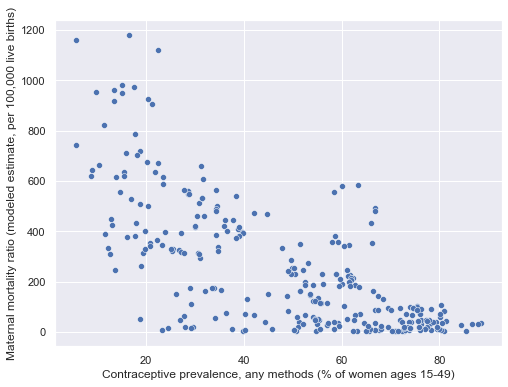

In [76]:
# Contraceptive use (ANY method) vs Maternal Mortality rate
sns.scatterplot(data=df, x= 'Contraceptive prevalence, any methods (% of women ages 15-49)', y ='Maternal mortality ratio (modeled estimate, per 100,000 live births)')


In [ ]:
There appears to be a negative correlation between contraceptive use and maternal mortality.

<AxesSubplot:xlabel='Contraceptive prevalence, any methods (% of women ages 15-49)', ylabel='Adolescent fertility rate (births per 1,000 women ages 15-19)'>

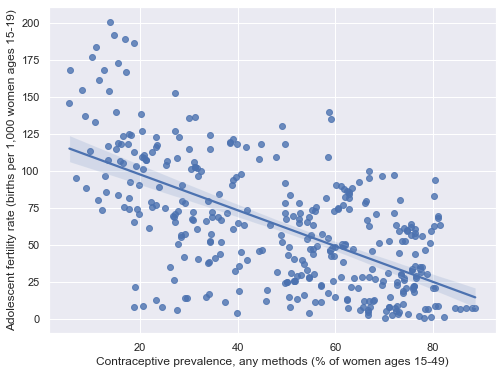

In [77]:
sns.regplot(data=df, x= "Contraceptive prevalence, any methods (% of women ages 15-49)",
            y="Adolescent fertility rate (births per 1,000 women ages 15-19)")  

In [ ]:
# A clear Negative correlation was found between Contraceptive use and Adolescent fertility rate

<AxesSubplot:xlabel='Contraceptive prevalence, any methods (% of women ages 15-49)', ylabel='Life expectancy at birth, total (years)'>

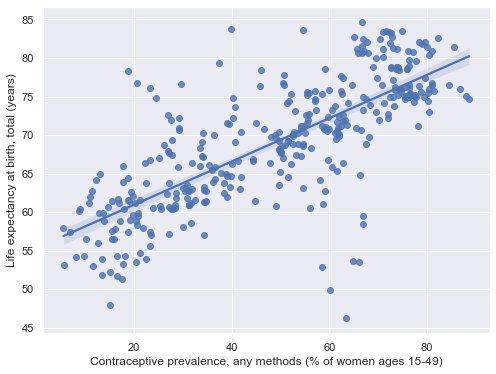

In [79]:
sns.regplot(data=df, 
            x="Contraceptive prevalence, any methods (% of women ages 15-49)", y="Life expectancy at birth, total (years)")  

In [ ]:
## There is a clear positive correlation between Use of Contraception and Life Expectancy

In [ ]:
#Countries with the highest ratios of Maternal Mortality are concentrated in Africa

<AxesSubplot:xlabel='Country Name', ylabel='Maternal mortality ratio (modeled estimate, per 100,000 live births)'>

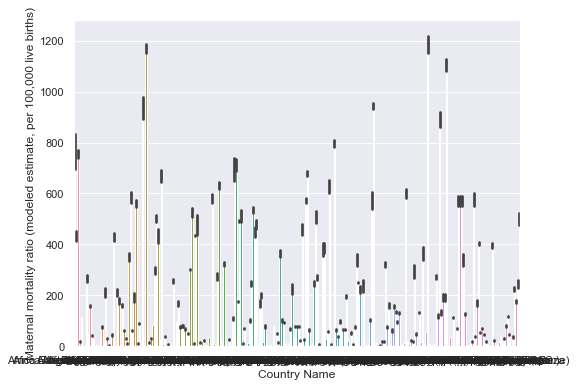

In [81]:
sns.barplot(x="Country Name", y="Maternal mortality ratio (modeled estimate, per 100,000 live births)", data=df)